In [67]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [68]:
def setup_directories():
    os.makedirs("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data", exist_ok=True)
    os.makedirs("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Crop", exist_ok=True)
    os.makedirs("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Weed", exist_ok=True)


In [69]:
def extract_dataset():
    zip_ref = zipfile.ZipFile('C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection.zip', 'r')
    zip_ref.extractall("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/")
    zip_ref.close()

In [70]:
# Extracting dataset and setting up directories
setup_directories()
extract_dataset()

In [71]:
# Processing dataset
data_info = pd.DataFrame(columns=["Image_Name", "Category", "X", "Y", "Width", "Height"])


In [72]:
image_names = []
categories = []
x_coords = []
y_coords = []
widths = []
heights = []
data_path = "C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/"
for file in os.listdir(data_path):
    if file.split(".")[-1] == "txt":
        with open(data_path + file, "r") as f:
            for line in f.readlines():
                data = line.split(" ")
                image_names.append(file.split(".")[0])
                categories.append(data[0])
                x_coords.append(data[1])
                y_coords.append(data[2])
                widths.append(data[3])
                heights.append(data[4])



In [73]:
data_info["Image_Name"] = pd.Series(image_names)
data_info["Category"] = pd.Series(categories)
data_info["X"] = pd.to_numeric(pd.Series(x_coords))
data_info["Y"] = pd.to_numeric(pd.Series(y_coords))
data_info["Width"] = pd.to_numeric(pd.Series(widths))
data_info["Height"] = pd.to_numeric(pd.Series(heights))


In [74]:
# Cropping images and saving to corresponding folders
def crop_and_save(image_name, x, y, w, h):
    source_path = 'C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/'
    image = plt.imread(f"{source_path}{image_name}.jpeg")

    W, H = image.shape[1], image.shape[0]

    X = x * W
    Y = y * H
    width = w * W
    height = h * H

    x1 = int(X - (int(width) // 2))
    y1 = int(Y - (int(height) // 2))
    x2 = int(X + (int(width) // 2))
    y2 = int(Y + (int(height) // 2))

    cropped_image = image[y1:y2, x1:x2]

    return cropped_image

In [75]:
# Cropping images and saving to folders
for index in range(data_info.shape[0]):
    cropped_image = crop_and_save(data_info.iloc[index, 0], data_info.iloc[index, 2], data_info.iloc[index, 3],
                                   data_info.iloc[index, 4], data_info.iloc[index, 5])
    reduced_img = Image.fromarray(cropped_image)
    reduced_img = reduced_img.resize((256, 256))

    if data_info.iloc[index, 1] == '0':
        reduced_img.save(f"C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Crop/{index}.jpeg")
    else:
        reduced_img.save(f"C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Weed/{index}.jpeg")


In [76]:
# Model Training
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [77]:
# Loading dataset
#dataset = image_dataset_from_directory("C:/Users/baruy/Downloads/Crop_and_Weed_Detection/Crop_and_Weed_Detection/Crop_and_Weed_Detection/agri_data/data/Cropped_data/", image_size=(256, 256))
dataset = image_dataset_from_directory("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/",image_size = (256,256))

Found 2072 files belonging to 2 classes.


In [78]:
# Normalizing dataset
def preprocess(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

dataset = dataset.map(preprocess)

In [79]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_40 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_15 (Ba  (None, 252, 252, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 conv2d_42 (Conv2D)          (None, 122, 122, 64)     

In [81]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [82]:
# Training the model
history = model.fit(dataset, epochs=10, batch_size=32)


Epoch 1/10
65/65 [==============================] - 471s 7s/step - loss: 0.3799 - accuracy: 0.8431
Epoch 2/10
65/65 [==============================] - 462s 7s/step - loss: 0.3022 - accuracy: 0.8847
Epoch 3/10
65/65 [==============================] - 506s 8s/step - loss: 0.2382 - accuracy: 0.9093
Epoch 4/10
65/65 [==============================] - 489s 8s/step - loss: 0.2196 - accuracy: 0.9247
Epoch 5/10
65/65 [==============================] - 464s 7s/step - loss: 0.2090 - accuracy: 0.9276
Epoch 6/10
65/65 [==============================] - 443s 7s/step - loss: 0.1817 - accuracy: 0.9445
Epoch 7/10
65/65 [==============================] - 498s 8s/step - loss: 0.1729 - accuracy: 0.9445
Epoch 8/10
65/65 [==============================] - 485s 7s/step - loss: 0.1827 - accuracy: 0.9459
Epoch 9/10
65/65 [==============================] - 462s 7s/step - loss: 0.1734 - accuracy: 0.9493
Epoch 10/10
65/65 [==============================] - 499s 8s/step - loss: 0.1411 - accuracy: 0.9590


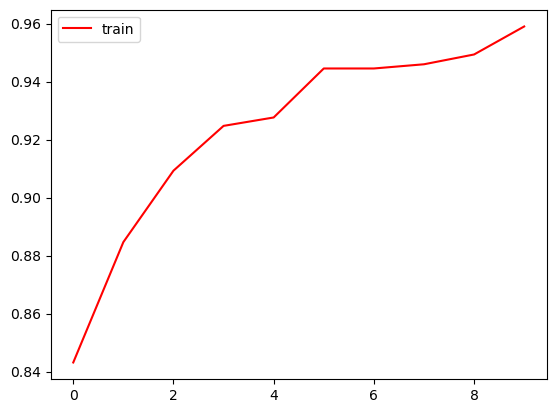

In [83]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.legend()
plt.show()

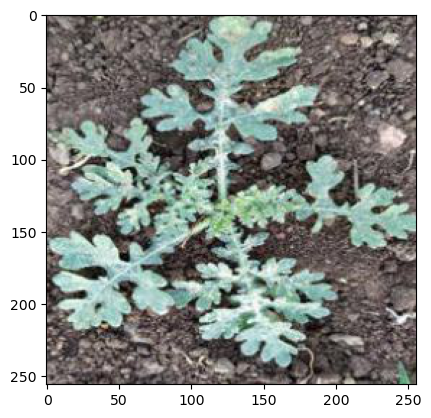

In [84]:
# Testing with a weed image
test_image = plt.imread("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Weed/1091.jpeg")
plt.imshow(test_image)
plt.show()

In [85]:
# Preprocessing and predicting on weed image
test_image = preprocess(test_image, 0)[0]
test_image = np.array(test_image).reshape((1, 256, 256, 3))
if model.predict([test_image])[0]:
    print("The above image is of Weed")
else:
    print("The above image is of Crop")

1/1 [==============================] - 1s 974ms/step
The above image is of Weed


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `validation_images` and `validation_labels` are predefined
predictions = model.predict(validation_images)
predictions = (predictions > 0.5).astype(int)

# Generating a classification report
report = classification_report(validation_labels, predictions, target_names=['Crop', 'Weed'])
print(report)

# Generating a confusion matrix
conf_matrix = confusion_matrix(validation_labels, predictions)
print(conf_matrix)

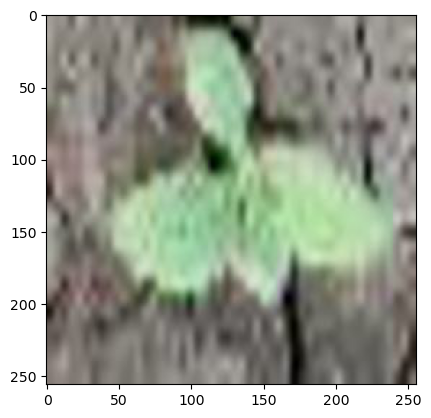

1/1 [==============================] - 0s 84ms/step
The above image is of Crop


In [86]:
# Testing with a crop image
test_image = plt.imread("C:/Users/baruy/Downloads/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/Project5_Ag_Crop_and_weed_detection/agri_data/data/Cropped_data/Crop/1033.jpeg")
plt.imshow(test_image)
plt.show()

# Preprocessing and predicting on crop image
test_image = preprocess(test_image, 0)[0]
test_image = np.array(test_image).reshape((1, 256, 256, 3))
if model.predict([test_image])[0] > 0.50:
    print("The above image is of Weed")
else:
    print("The above image is of Crop")